# Google Search vs Reality

Ever noticed how people say things like “Elon Musk’s tweets move Tesla stock” or “Bitcoin searches spike before price changes”?
<br>
It made me wonder, **do Google searches really reflect what happens in the real world?**

In this project, I’ll explore that idea using real data on:

Google search trends for Tesla, Bitcoin, and Unemployment.
Their actual outcomes — stock price, Bitcoin price, and unemployment rate.

**The goal: to check whether search interest reflects real-world changes or not**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 1. Import and Load Data

Load Google Trends and real-world data (Tesla, Bitcoin, Unemployment) for analysis.

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Folder path
folder = '/content/drive/MyDrive/GoogleSearchvsReality/'

# Load datasets
tesla = pd.read_csv(folder + 'TESLA Search Trend vs Price.csv')
bitcoin = pd.read_csv(folder + 'Daily Bitcoin Price.csv')
bitcoin_search = pd.read_csv(folder + 'Bitcoin Search Trend.csv')
unemployment = pd.read_csv(folder + 'UE Benefits Search vs UE Rate 2004-20.csv')

# Display the first few rows of each dataset to confirm successful loading
print("Tesla Data:")
display(tesla.head())

print("Bitcoin Data:")
display(bitcoin.head())

print("Bitcoin Search Data:")
display(bitcoin_search.head())

print("Unemployment Data:")
display(unemployment.head())

Tesla Data:


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


Bitcoin Data:


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


Bitcoin Search Data:


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


Unemployment Data:


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


## 2. Data Cleaning & Preparation
Converting all date columns into proper datetime format so that we can align and compare data easily in later visualizations.

In [5]:
# Converting date columns to datetime format
tesla['MONTH'] = pd.to_datetime(tesla['MONTH'])
bitcoin['DATE'] = pd.to_datetime(bitcoin['DATE'])
bitcoin_search['MONTH'] = pd.to_datetime(bitcoin_search['MONTH'])
unemployment['MONTH'] = pd.to_datetime(unemployment['MONTH'])

# Display to verify
print("Tesla Data Types:\n", tesla.dtypes)
print("\nBitcoin Data Types:\n", bitcoin.dtypes)
print("\nBitcoin Search Data Types:\n", bitcoin_search.dtypes)
print("\nUnemployment Data Types:\n", unemployment.dtypes)

Tesla Data Types:
 MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

Bitcoin Data Types:
 DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object

Bitcoin Search Data Types:
 MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

Unemployment Data Types:
 MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object


## 3. Align and simplify data for analysis
Selecting only the columns we need and rename them for clarity (so later plots and merges are easier to read).

In [6]:
tesla = tesla[['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE']]
bitcoin = bitcoin[['DATE', 'CLOSE']]
bitcoin_search = bitcoin_search[['MONTH', 'BTC_NEWS_SEARCH']]
unemployment = unemployment[['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE']]

# Rename columns to simpler names
bitcoin = bitcoin.rename(columns={'DATE': 'MONTH', 'CLOSE': 'BTC_USD_CLOSE'})

# Quick check
print(tesla.head(3))
print(bitcoin.head(3))
print(bitcoin_search.head(3))
print(unemployment.head(3))

       MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0 2010-06-01                3           4.766
1 2010-07-01                3           3.988
2 2010-08-01                2           3.896
       MONTH  BTC_USD_CLOSE
0 2014-09-17     457.334015
1 2014-09-18     424.440002
2 2014-09-19     394.795990
       MONTH  BTC_NEWS_SEARCH
0 2014-09-01                5
1 2014-10-01                4
2 2014-11-01                4
       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0 2004-01-01                       9     5.7
1 2004-02-01                       8     5.6
2 2004-03-01                       7     5.8


## 4.Visualize Google Search interest vs real-world data
Ploting how Google search trends compare with real data — for Tesla, Bitcoin, and Unemployment — to visually check if there’s any correlation.

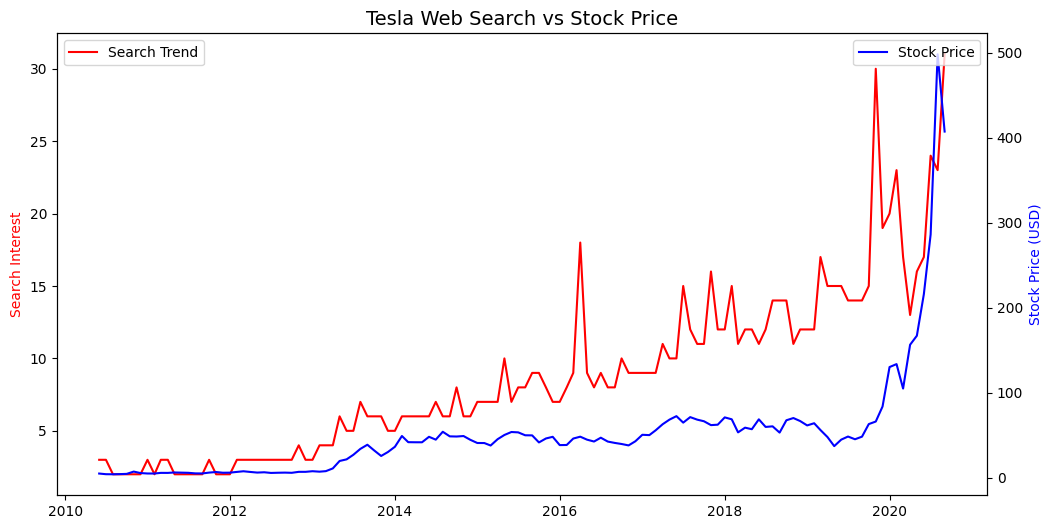

In [7]:
import matplotlib.pyplot as plt

# Step 4A: Tesla - Search vs Stock Price
plt.figure(figsize=(12,6))
plt.title('Tesla Web Search vs Stock Price', fontsize=14)
plt.plot(tesla['MONTH'], tesla['TSLA_WEB_SEARCH'], color='red', label='Search Trend')
plt.ylabel('Search Interest', color='red')
plt.legend(loc='upper left')

ax2 = plt.gca().twinx()
ax2.plot(tesla['MONTH'], tesla['TSLA_USD_CLOSE'], color='blue', label='Stock Price')
ax2.set_ylabel('Stock Price (USD)', color='blue')
plt.legend(loc='upper right')
plt.show()

## 5. Bitcoin Search vs Price
seeing if search interest for Bitcoin aligns with its price movement over time.

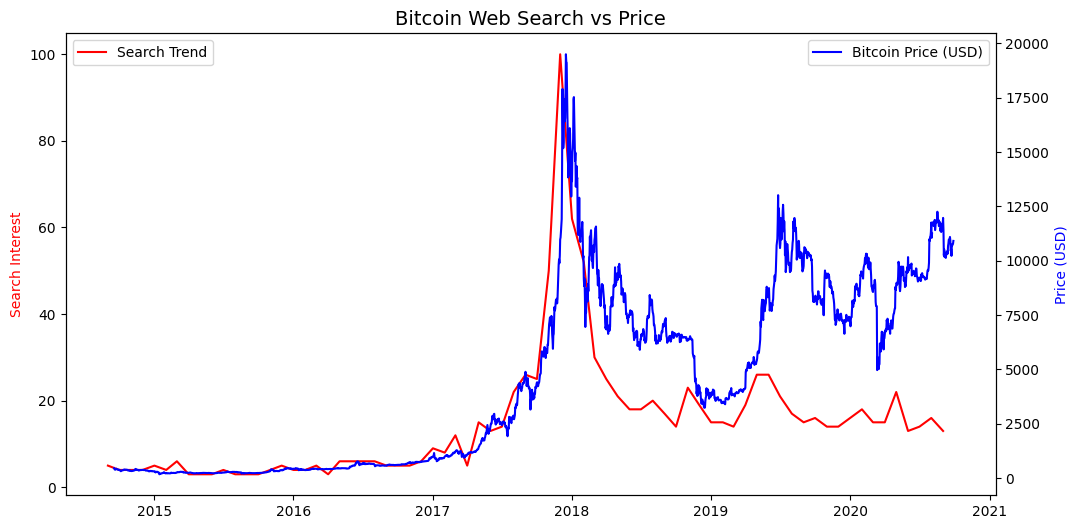

In [8]:
plt.figure(figsize=(12,6))
plt.title('Bitcoin Web Search vs Price', fontsize=14)

# Plot search trend (red)
plt.plot(bitcoin_search['MONTH'], bitcoin_search['BTC_NEWS_SEARCH'], color='red', label='Search Trend')
plt.ylabel('Search Interest', color='red')
plt.legend(loc='upper left')

# Plot price (blue)
ax2 = plt.gca().twinx()
ax2.plot(bitcoin['MONTH'], bitcoin['BTC_USD_CLOSE'], color='blue', label='Bitcoin Price (USD)')
ax2.set_ylabel('Price (USD)', color='blue')
plt.legend(loc='upper right')

plt.show()

## 6. Unemployment Search vs Actual Rate
checking if search trends for unemployment benefits reflect real-world unemployment rates.

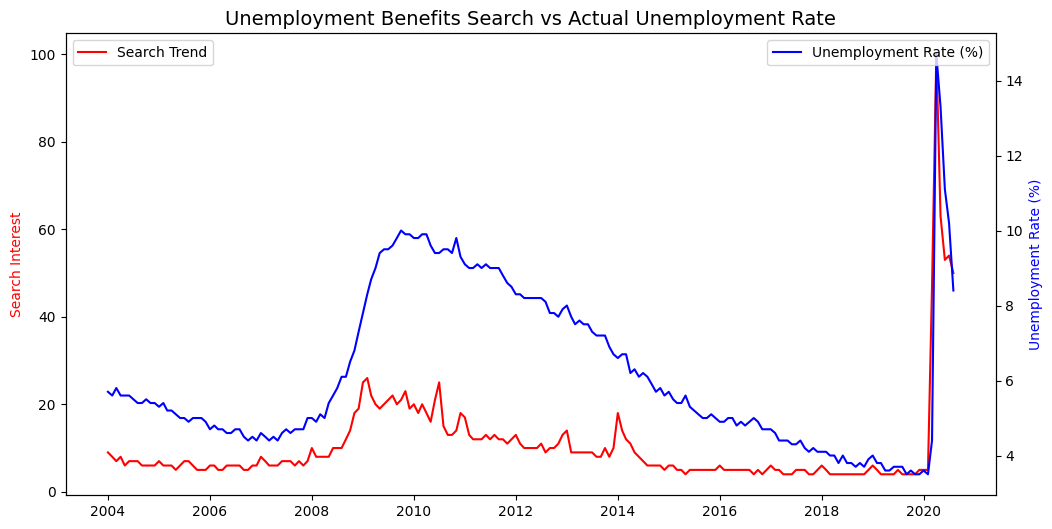

In [9]:
plt.figure(figsize=(12,6))
plt.title('Unemployment Benefits Search vs Actual Unemployment Rate', fontsize=14)

# Plot search trend (red)
plt.plot(unemployment['MONTH'], unemployment['UE_BENEFITS_WEB_SEARCH'], color='red', label='Search Trend')
plt.ylabel('Search Interest', color='red')
plt.legend(loc='upper left')

# Plot actual unemployment rate (blue)
ax2 = plt.gca().twinx()
ax2.plot(unemployment['MONTH'], unemployment['UNRATE'], color='blue', label='Unemployment Rate (%)')
ax2.set_ylabel('Unemployment Rate (%)', color='blue')
plt.legend(loc='upper right')

plt.show()

## 7. Check Correlation Between Search Interest and Real-World Data
using the .corr() method to measure relationships between each pair of variables.

In [10]:
# Tesla correlation between web search and stock price
tesla_corr = tesla['TSLA_WEB_SEARCH'].corr(tesla['TSLA_USD_CLOSE'])

# Bitcoin correlation between search trend and price
bitcoin_merged = pd.merge(bitcoin_search, bitcoin, on='MONTH')
bitcoin_corr = bitcoin_merged['BTC_NEWS_SEARCH'].corr(bitcoin_merged['BTC_USD_CLOSE'])

# Unemployment correlation between search trend and actual rate
unemployment_corr = unemployment['UE_BENEFITS_WEB_SEARCH'].corr(unemployment['UNRATE'])

# Print results
print(f"Tesla Search vs Stock Price Correlation: {tesla_corr:.2f}")
print(f"Bitcoin Search vs Price Correlation: {bitcoin_corr:.2f}")
print(f"Unemployment Search vs Unemployment Rate Correlation: {unemployment_corr:.2f}")

Tesla Search vs Stock Price Correlation: 0.74
Bitcoin Search vs Price Correlation: 0.64
Unemployment Search vs Unemployment Rate Correlation: 0.71


## Step 8: Insights from the Data
- Tesla (r = 0.74): Search interest rises and falls closely with Tesla’s stock price, suggesting investor and public curiosity track its market performance.

- Bitcoin (r = 0.64): Strong link between spikes in Bitcoin searches and its price peaks. Public hype seems to surge just before or during price booms.

- Unemployment (r = 0.71): Search interest in unemployment benefits rises sharply before the unemployment rate peaks, acting as a leading indicator of economic stress.

**Conclusion:**
Google search data reflects realworld behavior surprisingly well it can even act as an early signal for major trends.